# Analysis the Temperature in 2D

by Xikun Hu



In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from numpy import datetime64
from ipywidgets import interact 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.simplefilter('ignore')
from dask.diagnostics import ProgressBar
import matplotlib.cm as cm

In [ ]:
xr.show_versions()

In [2]:
ESDC_img = xr.open_zarr("/home/jovyan/work/datacube/ESDCv2.0.0/esdc-8d-0.25deg-1x720x1440-2.0.0.zarr")

In [ ]:
ESDC_time = xr.open_zarr("/home/jovyan/work/datacube/ESDCv2.0.0/esdc-8d-0.25deg-184x90x90-2.0.0.zarr")

In [3]:
Europe = ESDC_img.sel(lat = slice(45.,35.), lon = slice(-12.5,-5.))

In [4]:
## time series from 2000 to 2015
Europe = Europe.sel(time = slice('2003-08-01','2003-08-30'))

In [5]:
%time Europe_mean_month = Europe.mean(dim='time').compute()
Europe_mean_month_temp = Europe_mean_month.air_temperature_2m

CPU times: user 1.42 s, sys: 644 ms, total: 2.06 s
Wall time: 939 ms


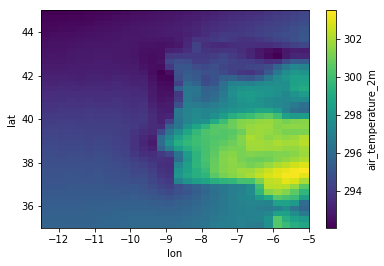

In [6]:
# from matplotlib.colors import LogNorm
plt.figure()
Europe_mean_month_temp.plot()
# plt.savefig('Sum_API_time_dimension_temp.png', dpi = 500,bbox_inches='tight')

In [7]:
Temp_week = Europe.air_temperature_2m.groupby('time.week').mean(dim='time')
# Temp_week

<Figure size 432x288 with 0 Axes>

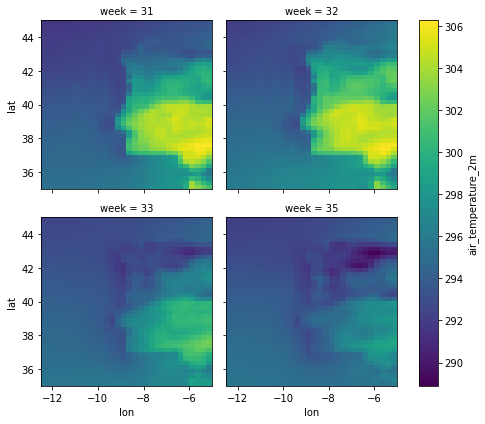

In [8]:
plt.figure()
Temp_week.plot.imshow(x='lon',y='lat',col='week',col_wrap=2)
# plt.savefig('Temp_group_Week_mean.png', dpi = 500,bbox_inches='tight')

## Analysis the number of temperature points over 300 K

In [9]:
def above_Nsigma(x,Nsigma):
    return xr.ufuncs.fabs(x)>Nsigma

In [10]:
res = Europe.apply(above_Nsigma, Nsigma = 300)

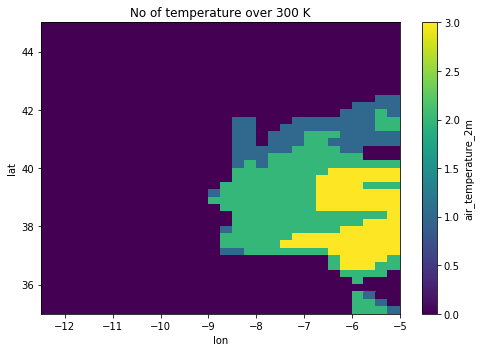

In [11]:
fig2, ax2 = plt.subplots(figsize = [7,5], ncols=1)

res.air_temperature_2m.sum(dim="time").plot(ax = ax2)
ax2.set_title("No of temperature over 300 K")

plt.tight_layout()
# plt.savefig('Temp_over_300K.png', dpi = 500,bbox_inches='tight')